# **IIRFilter**
 

*   Mykola Liashuha
*   Jose Gonzalez Lopez



# Introduction
In this work we will use the audio from the previous exercise to create a IIR delay effect. First, we will determine the impulse response of the filter for D=1. Next, the frequency response of the filter will be calculated. After that,the delay effect will be applied to the audio. Last, we will conclude the notebook by wraping up all the concepts explored in the exercise.


# Auxiliar Functions

In [ ]:
def iir_step(x_orig, x, a, b, D, t):
    if t - D < 0:
#         print(f'step at {t}, D {D} with x_orig {x_orig[t]}; a {a}, b {b} => {a*x_orig[t]}')
        return a*x_orig[t]
    else:
#         print(f'step at {t}, D {D} with x_orig {x_orig[t]} and second {x[t-D]}; a {a}, b {b} => {a*x_orig[t] + b*x[t-D]}')
        return a*x_orig[t] + b*x[t-D]
    
def IIR(data, a, b, D):
    data_new = data.copy().astype('float32')
    for i in range(0, data_new.shape[0]):
        data_new[i] = iir_step(data, data_new, a, b, D, i)
    return data_new
    
def get_impulse_response(D, a, init=1.0):
    res = []
    res.append(init)
    
    for i in range(1, D):
        res.append(0)
    res.append(-a)
    return res


# The Filter
Our main goal is to implement the following FIR delay effect using the formula:

$s[t]=αe[t]+βs[t−D]$

where α is the scaling factor, β the attenuation factor, $D$ is the time delay, $s$ is the output signal and $e$ the input. Our first objective will be to get the impulse response of the filter ($h[t]$). Let's assume that $α=0.1$, $β=0.3$ and $D=1$. Our formula now will be:

$s[t]=0.1 \cdot e[t]+0.3 \cdot e[t−1]$

We will also assume that the signal is causal and stable. Having that:

We can apply the z-transform to get the transfer function and thus get the frecuency respond

$S(z)=\alpha \cdot E(z) + \beta \cdot z^{-1} \cdot S(z)$

$S(z)-\beta \cdot z^{-1} \cdot S(z) = \alpha \cdot E(z)$

$(1-\beta \cdot z^{-1})S(z) = \alpha \cdot E(z)$

$\frac{S(z)}{E(z)}=\frac{\alpha}{(1-\beta \cdot z^{-1})}$

$H(z) = \frac{\alpha}{(1-\beta \cdot z^{-1})}$

Having Euler's identity

$H(e^{i2\pi\lambda}) = \frac{\alpha}{(1-\beta \cdot e^{-i2\pi\lambda})}$

Consider $2\pi\lambda =\theta$ 

The frecuency respond is

$H(\theta)=|\frac{\alpha}{(1-\beta \cdot e^{-i\theta})}|^{2}$

$H(\theta)=\frac{\alpha^{2}}{((1-\beta \cdot cos(\theta))^{2} + (\beta \cdot sin(\theta))^{2}}$

$H(\theta)=\frac{\alpha^{2}}{β^2\cos ^2\left(θ\right)-2β\cos \left(θ\right)+1+β^2\sin ^2\left(θ\right)}$

# Imports

In [ ]:
import numpy as np #Numpy for calculations
import sklearn #Use this library to normalize
import math #For calculations
import scipy.signal
from scipy.io import wavfile #Read wav files
from matplotlib import pyplot as plt #Plots
from scipy.fft import fft, ifft,fftfreq #Fourier transform

In [ ]:
from scipy.io import wavfile
samplerate, data = wavfile.read('string_2.wav') #Read the data stream and get samplerate
ALPHA=0.1 #Attenuation Factor
DELAY=1 #Time delay

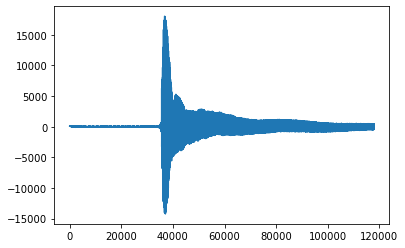

In [ ]:
plt.plot(data)

## Applying delay effect to audio signal

In the following part we are going to apply delay effect with IIR using two implementations: our own one and one from scipy. We are going to compare their performance. For sake of comparison, we compared a very small part of a signal to see whether there is any difference between processed signal and original one, and also to compare both implementations.

Impulse response A [0.1]
Impulse response B [1.0, 0, 0, -0.5]


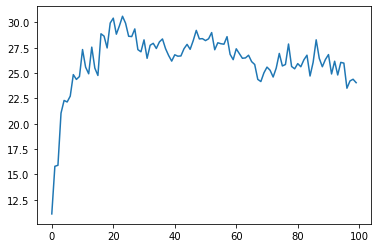

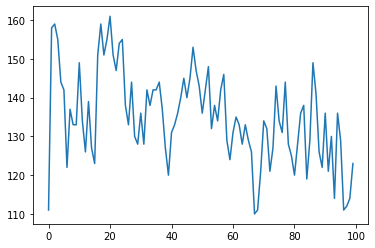

In [ ]:
#SCIPY IIR

D = 3
A = 0.1
B = 0.5


a = [A]
b = get_impulse_response(D, B)


print('Impulse response A', a)
print('Impulse response B', b)

data_new = scipy.signal.lfilter(a, b, data)
plt.plot(data_new[:100])
plt.show()

plt.plot(data[:100])
plt.show()

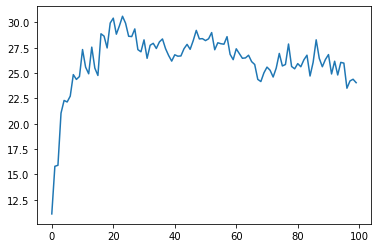

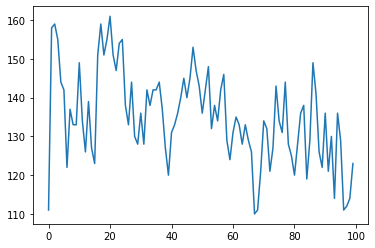

In [ ]:
#OUR IIR

D = 3
A = 0.1
B = 0.5


data_new = IIR(data, A, B, D)

plt.plot(data_new[:100])
plt.show()

plt.plot(data[:100])
plt.show()

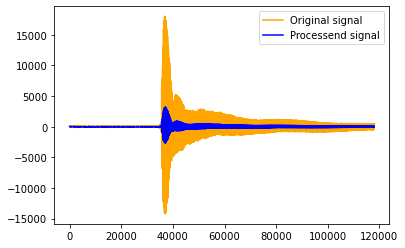

In [ ]:

plt.plot(data, c='orange', label="Original signal")

plt.plot(data_new, c='blue', label="Processend signal")

plt.legend()
plt.show()

As you see from image above the difference between processed signal and original one is quite significant. Throughout multiple experiments with parameters, parameter Beta is able to create a lot of chaos if it is set to high value. As an example, seeting Beta to 1.5 would make the signal rowing exponentially to extremely gih values (even more than maximum vlaue of float32).

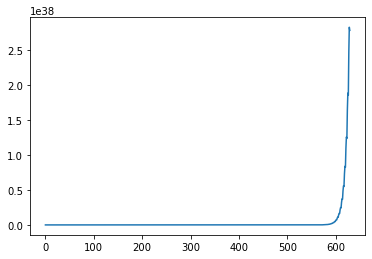

In [ ]:
#OUR IIR

D = 3
A = 0.1
B = 1.5


data_new = IIR(data, A, B, D)

plt.plot(data_new)
plt.show()


As well as we computed frequency response that is displayed below.

Impulse response A [0.1]
Impulse response B [1.0, 0, 0, 0, 0, 0, 0, -0.3]


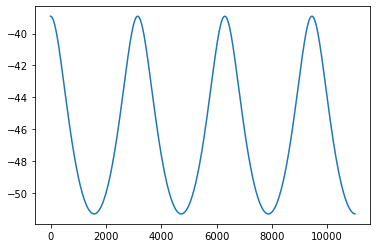

In [ ]:
D = 7
A = 0.1
B = 0.3


a = [A]
b = get_impulse_response(D, B)

print('Impulse response A', a)
print('Impulse response B', b)

H, W = scipy.signal.freqz(a, b,fs=samplerate)
plt.plot(H,20*np.log(np.abs(W)+np.finfo(np.float32).eps))

## Summary

Overall, it is visible that IIR filter is quite different from FIR in terms of filtering abilities. IIR delay effect can change the incoming signal in much higher extent. Though this property makes IIR very dependant on "coorectness" of its parameters. That's why if parameters are set to improper values - the output signal might become a total mess after all.